# RBF interpolation examples

Implementation of several implicit surface representation examples using Radial Basis Functions (RBF's). In this notebook, we will start with a simple example of interpolation of a layer stack, and then subsequently go to more complex geological models, testing different varieties of RBF kernels.


In [3]:
import numpy as np
from scipy.interpolate import Rbf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm


In [4]:
plt.rcParams['figure.figsize'] = (8., 6.)
plt.rcParams['font.size'] = 16.

## Layer stack

The first model we will consider is a simple layer stack of (completely) parallel layers, e.g. something we would expect to observe in a sedimentary system:

In [5]:
# define layer stack as functions:
def l1(x):
    return 3*x+10


In [6]:
l1 = lambda x : 0.25*x + 10
l2 = lambda x : 0.25*x + 20
l3 = lambda x : 0.25*x + 30

(-4.95, 103.95, 7.762499999999999, 56.9875)

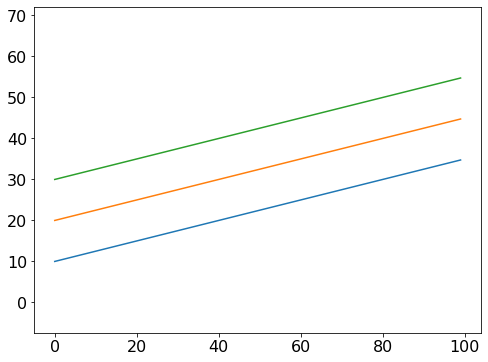

In [7]:
xvals = np.arange(100)
plt.plot(xvals, l1(xvals))
plt.plot(xvals, l2(xvals))
plt.plot(xvals, l3(xvals))
plt.axis('equal')

### Randomly sample points

We now randomly extract a set of interface points from these lines:


(18.915581632318247, 101.8459835625636, 14.043538521830278, 49.85399050187584)

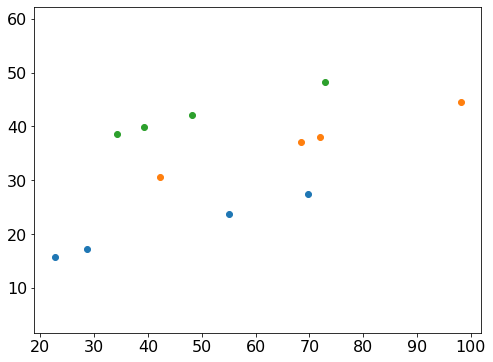

In [8]:
n_pts = 4 # Points per layer

# set seed for reproducibility
np.random.seed(123)
l1_pts_x = np.random.uniform(0,100,n_pts)
l1_pts_y = l1(l1_pts_x)
l2_pts_x = np.random.uniform(0,100,n_pts)
l2_pts_y = l2(l2_pts_x)
l3_pts_x = np.random.uniform(0,100,n_pts)
l3_pts_y = l3(l3_pts_x)


# plt.plot(xvals, l1(xvals))
# plt.plot(xvals, l2(xvals))
# plt.plot(xvals, l3(xvals))

plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')

plt.axis('equal')


### RBF interpolation

Next, we fit the scalar field (in 2-D) to these points. Note that we need to assign values to the interface points. This step is ambiguous, as these values do not have a distinct geological meaning (an exception could be the interpretation of the scalar field values as geological time - assuming constant material deposition).

We are here using the RBF implementation in `scipy.interpolate`. The default interpolation kernel is the *multiquadric* kernel:

$$f(r) = \sqrt{\left(\frac{r}{\epsilon}\right)^2 + 1}$$

Important is here the parameter $\epsilon$: this is the scaling parameter of the kernel, similar to the *range* in geostatistical kernels. 

In addition, the RBF-implementation contains a smoothing option with the optional argument `smooth`:

```
smooth : float, optional
    Values greater than zero increase the smoothness of the
    approximation.  0 is for interpolation (default), the function will
    always go through the nodal points in this case.
```

This parameter is similar to the *nugget* value in geostatistical interpolations. For more information on the RBF interpolation in scipy, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Rbf.html


In [9]:
# set up grid
ti = np.linspace(0, 100, 100)
XI, YI = np.meshgrid(ti, ti)

# combine data in arrays
x = np.hstack([l1_pts_x, l2_pts_x, l3_pts_x])
y = np.hstack([l1_pts_y, l2_pts_y, l3_pts_y])

# give points values
z = np.hstack([np.ones(n_pts)*10, np.ones(n_pts)*20, np.ones(n_pts)*30])

# use RBF
rbf = Rbf(x, y, z, epsilon=2)
ZI = rbf(XI, YI)

We will also safe the points for further use:

In [10]:
np.save("pts_line_model_x", x)
np.save("pts_line_model_y", y)
np.save("pts_line_model_z", z)

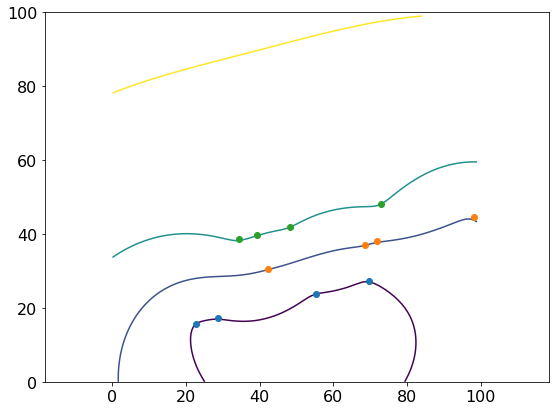

In [11]:
plt.contour(ZI, [10,20,30,50])
plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')

plt.axis('equal')
plt.xlim([0,100])
plt.ylim([0,100])
plt.tight_layout()

### Testing different types of interp



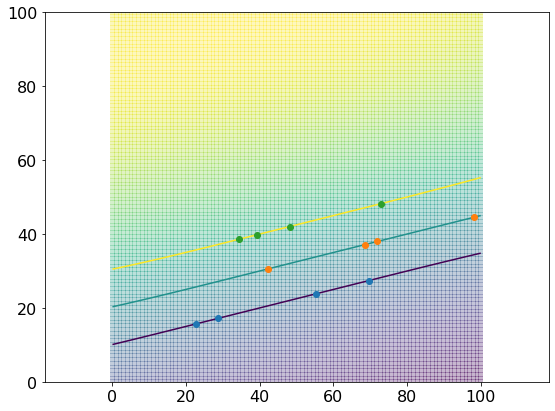

In [13]:
# use RBF
rbf = Rbf(x, y, z, function="gaussian", smooth=0., epsilon=100)
ZI = rbf(XI, YI)
plt.pcolor(XI, YI, ZI, alpha=0.3, shading='auto')
plt.contour(XI, YI, ZI, [10,20,30])
# plt.colorbar()
# plt.plot(xvals, l1(xvals))
# plt.plot(xvals, l2(xvals))
# plt.plot(xvals, l3(xvals))

plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')

plt.axis('equal')
plt.xlim([0,100])
plt.ylim([0,100])
plt.tight_layout()

### Extract only contours of interpolated lines


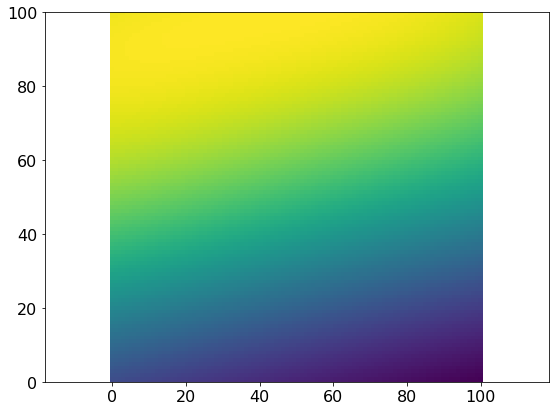

In [15]:
plt.pcolor(XI, YI, ZI, shading='auto')
# plt.contour(XI, YI, ZI, 20, alpha=0.6, colors='k')
plt.axis('equal')
plt.xlim([0,100])
plt.ylim([0,100])
plt.tight_layout()

### Add a new layer (inbetween and outside)

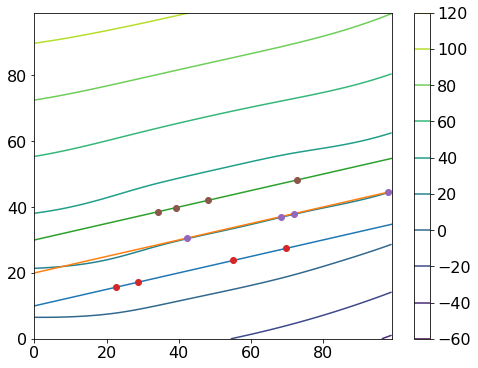

In [16]:
# new point, between existing lines
l4_v = 25
l4_x = 60
l4_y = 0.25*60+l4_v

# combine data in arrays
x_int = np.hstack([x, l4_x])
y_int = np.hstack([y, l4_y])

# give points values
z_int = np.hstack([z, l4_v])

rbf = Rbf(x, y, z, function="thin_plate")
ZI = rbf(XI, YI)
plt.contour(ZI)
plt.colorbar()
plt.plot(xvals, l1(xvals))
plt.plot(xvals, l2(xvals))
plt.plot(xvals, l3(xvals))

plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')

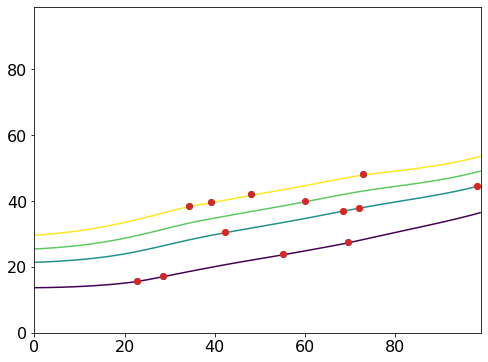

In [17]:
layer_vals = [10,20,25,30]
plt.contour(ZI, levels=layer_vals)
plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')
plt.plot(x_int, y_int, 'o')

### Point outside


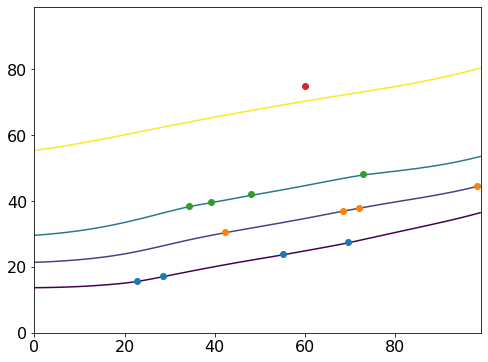

In [18]:
# new point, between existing lines
l5_v = 60
l5_x = 60
l5_y = 0.25*60+l5_v

# combine data in arrays
x_out = np.hstack([x, l5_x])
y_out = np.hstack([y, l5_y])

# give points values
z_out = np.hstack([z, l5_v])

rbf = Rbf(x, y, z, function="thin_plate")
ZI = rbf(XI, YI)

layer_vals = [10,20,30,l5_v]
plt.contour(ZI, levels=layer_vals)
plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')
plt.plot(l5_x, l5_y, 'o')

## More complex layers

In [19]:
l1 = lambda x : 10*np.sin(0.1*x) + 10
l2 = lambda x : 10*np.sin(0.1*x) + 20
l3 = lambda x : 10*np.sin(0.1*x) + 30

(-5.0, 105.0, -1.999971452300779, 41.99999549246729)

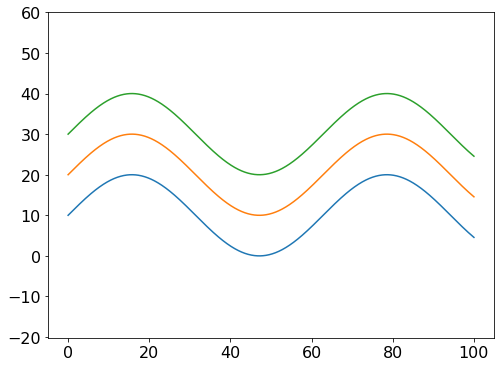

In [20]:
xvals = np.linspace(0,100,1000)
plt.plot(xvals, l1(xvals))
plt.plot(xvals, l2(xvals))
plt.plot(xvals, l3(xvals))
plt.axis('equal')

### Sample points


(-5.0, 105.0, -1.999971452300779, 41.99999549246729)

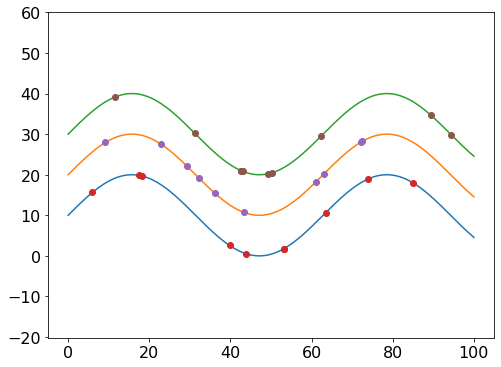

In [21]:
n_pts = 10 # Points per layer
l1_pts_x = np.random.uniform(0,100,n_pts)
l1_pts_y = l1(l1_pts_x)
l2_pts_x = np.random.uniform(0,100,n_pts)
l2_pts_y = l2(l2_pts_x)
l3_pts_x = np.random.uniform(0,100,n_pts)
l3_pts_y = l3(l3_pts_x)


plt.plot(xvals, l1(xvals))
plt.plot(xvals, l2(xvals))
plt.plot(xvals, l3(xvals))

plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')

plt.axis('equal')

### Interpolate

In [22]:
# set up grid
ti = np.linspace(0, 100, 100)
XI, YI = np.meshgrid(ti, ti)

# combine data in arrays
x = np.hstack([l1_pts_x, l2_pts_x, l3_pts_x])
y = np.hstack([l1_pts_y, l2_pts_y, l3_pts_y])

# give points values
z = np.hstack([np.ones(n_pts)*10, np.ones(n_pts)*20, np.ones(n_pts)*30])



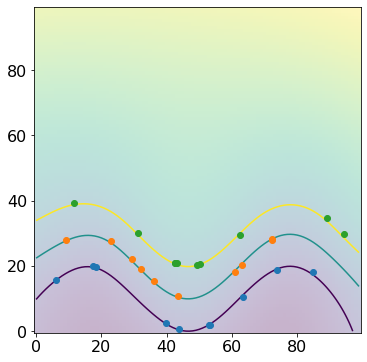

In [24]:
# use RBF
rbf = Rbf(x, y, z, epsilon=20)
ZI = rbf(XI, YI)
layer_vals = [10,20,30]
plt.contour(ZI, levels=layer_vals)
plt.imshow(ZI, alpha=0.3, origin='lower')
plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')

